:# **Project Image Classification - Ayu Peraiyantika**

In [ ]:
#Load Directory Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Load Kaggle Config
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Colab Notebooks/Prak Machine Learning/TubesMachineLearning/"

In [ ]:
#Changing the working directory

%cd /content/gdrive/My Drive/Colab Notebooks/Prak Machine Learning/TubesMachineLearning/

/content/gdrive/My Drive/Colab Notebooks/Prak Machine Learning/TubesMachineLearning


In [ ]:
#Download Dataset RockPapersCissors from Kaggle
!kaggle datasets download -d drgfreeman/rockpaperscissors

Dataset URL: https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors
License(s): CC-BY-SA-4.0
rockpaperscissors.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
from keras.preprocessing import image

import time
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Extract File Zip from Directory in Gdrive
import zipfile
local_zip = "/content/gdrive/My Drive/Colab Notebooks/Prak Machine Learning/TubesMachineLearning/rockpaperscissors.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
#listdir("/content/gdrive/My Drive/Colab Notebooks/Prak Machine Learning/TubesMachineLearning/")

#**Data Understanding**

In [ ]:
#Melihat sebaran data pada setiap kelas
#Jumlah Data Papers
print("Jumlah Data Paper: ", len(os.listdir("/content/gdrive/My Drive/Colab Notebooks/Prak Machine Learning/TubesMachineLearning/paper")))
#Jumlah Data Rocks
print("Jumlah Data Rock: ", len(os.listdir("/content/gdrive/My Drive/Colab Notebooks/Prak Machine Learning/TubesMachineLearning/rock")))
#Jumlah Data Cissors
print("Jumlah Data Scissor: ", len(os.listdir("/content/gdrive/My Drive/Colab Notebooks/Prak Machine Learning/TubesMachineLearning/scissors")))


Jumlah Data Paper:  812
Jumlah Data Rock:  826
Jumlah Data Scissor:  850


In [ ]:
#Path Base Directory
base_dir = "/content/gdrive/My Drive/Colab Notebooks/Prak Machine Learning/TubesMachineLearning/"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

#Path Asli Dataset
paper_dir = os.path.join(base_dir,"paper")
rock_dir = os.path.join(base_dir, "rock")
scissor_dir = os.path.join(base_dir, "scissors")

#Mengecek serta Membuat direktori train dan validation jika belum tersedia
if not os.path.exists(train_dir):
  os.mkdir(train_dir)
if not os.path.exists(validation_dir):
  os.mkdir(validation_dir)

In [ ]:
#Membuat direktori untuk menampung data generator (untuk data training dan data validation)
train_paper = os.path.join(train_dir, "paper")
train_rock = os.path.join(train_dir, "rock")
train_scissors = os.path.join(train_dir, "scissors")

val_paper = os.path.join(validation_dir, "paper")
val_rock = os.path.join(validation_dir, "rock")
val_scissors = os.path.join(validation_dir, "scissors")

#Mengecek serta Membuat direktori train (paper, rock, scissors)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

#Mengecek serta Membuat direktori validation (paper, rock, scissors) jika belum tersedia
if not os.path.exists(val_paper):
    os.mkdir(val_paper)
if not os.path.exists(val_rock):
    os.mkdir(val_rock)
if not os.path.exists(val_scissors):
    os.mkdir(val_scissors)

In [ ]:
#Memecah direktori paper menjadi data train sebesar 80% dan data validation sebesar 20%
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.2)

#Memecah direktori rock menjadi data train sebesar 80% dan data validation sebesar 20%
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.2)

#Memecah direktori scissors menjadi data train sebesar 80% dan data validation sebesar 20%
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissor_dir), test_size=0.2)

In [ ]:
#copy data train dan data validation kedalam direktori baru
import shutil
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(train_paper,i))

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock,i))

for i in train_scissors_dir:
  shutil.copy(os.path.join(scissor_dir, i), os.path.join(train_scissors,i))

for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(val_paper,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))

for i in val_scissors_dir:
  shutil.copy(os.path.join(scissor_dir, i), os.path.join(val_scissors,i))

In [ ]:
#Melihat sebaran data pada setiap kelas
#Jumlah Data Papers
print("Jumlah Data Paper: ", len(os.listdir("/content/gdrive/My Drive/Colab Notebooks/Prak Machine Learning/TubesMachineLearning/paper")))
#Jumlah Data Rocks
print("Jumlah Data Rock: ", len(os.listdir("/content/gdrive/My Drive/Colab Notebooks/Prak Machine Learning/TubesMachineLearning/rock")))
#Jumlah Data Cissors
print("Jumlah Data Scissor: ", len(os.listdir("/content/gdrive/My Drive/Colab Notebooks/Prak Machine Learning/TubesMachineLearning/scissors")))

print("======================================================== DATA TRAIN ==================================================")
print("Jumlah Data Train Paper: ", len(os.listdir(train_paper)))
print("Jumlah Data Train Rock: ", len(os.listdir(train_rock)))
print("Jumlah Data Train Scissors: ", len(os.listdir(train_scissors)))

print("===================================================== DATA VALIDATION ================================================")
print("Jumlah Data Validation Paper: ", len(os.listdir(val_paper)))
print("Jumlah Data Validation Rock: ", len(os.listdir(val_rock)))
print("Jumlah Data Validation Scissors: ", len(os.listdir(val_scissors)))


Jumlah Data Paper:  812
Jumlah Data Rock:  826
Jumlah Data Scissor:  850
======================================================== DATA TRAIN ==================================================
Jumlah Data Train Paper:  805
Jumlah Data Train Rock:  821
Jumlah Data Train Scissors:  848
===================================================== DATA VALIDATION ================================================
Jumlah Data Validation Paper:  400
Jumlah Data Validation Rock:  394
Jumlah Data Validation Scissors:  420


#**Data Modeling**

In [ ]:
#Membuat Image Data Generator
train_data_gen = ImageDataGenerator(
    rescale = 1./255 , #membuat warna menjadi abu - abu
    rotation_range = 20,
    horizontal_flip = True, #tampak kiri dan kanan
    shear_range = 0.2,
    fill_mode = "nearest"
)

#Test Data Generator
test_data_gen = ImageDataGenerator(
    rescale = 1./255 , #membuat warna menjadi abu - abu
    rotation_range = 20,
    horizontal_flip = True, #tampak kiri dan kanan
    shear_range = 0.2,
    fill_mode = "nearest"
)

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_dir, #nama direktori data latih
    target_size=(150,150), #normalisasi gambar menjadi 150*150 pixel
    batch_size=32,
    class_mode='categorical' #karena merupakan masalah klasifikasi multikelas maka menggunakan class_mode categorical
)

validation_generator = test_data_gen.flow_from_directory(
    validation_dir, #nama direktori data latih
    target_size=(150,150), #normalisasi gambar menjadi 150*150 pixel
    batch_size=32,
    class_mode='categorical' #karena merupakan masalah klasifikasi multikelas maka menggunakan class_mode categorical
)


Found 2474 images belonging to 3 classes.
Found 1214 images belonging to 3 classes.


In [ ]:
#Membuat fungsi recall untuk mengukur tingkat keberhasilan sistem dalam menemukan kembali sebuah informasi
def rec(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

#Membuat fungsi Precision untuk mengukur tingkat ketepatan antara informasi yang diminta.
def prec(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [ ]:
import numpy as np # Added import to handle potential division by zero

#Membuat Model Sequential dengan Hyper Parameter Optimasi Adam
ModelAdam = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax') #terdiri dari 3 kelas
])

#Membuat Model Sequential dengan Hyper Parameter Optimasi Nadam
ModelNadam = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax') #terdiri dari 3 kelas
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile Parameter Optimasi Adam dan Nadam
ModelAdam.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', prec, rec])
ModelNadam.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy', prec, rec])

**# Train Model**



In [ ]:
#Model Adam

print("\nStart Training Model Adam\n")
start_time = time.time()
HistoryAdam = ModelAdam.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2
)
print("\nStop Training")
time_adam = ((time.time() - start_time) /60)
print("Duration Learning : ", time_adam)

# #Model Nadam
# print("\nStart Training Model Nadam\n")
# start_time = time.time()
# HistoryNadam = ModelNadam.fit(
#     train_generator,
#     steps_per_epoch = 25,
#     epochs = 50,
#     validation_data = validation_generator,
#     validation_steps = 5,
#     verbose = 2
# )
# print("\nStop Training")
# time_nadam = ((time.time() - start_time) /60)
# print("Duration Learning : ", time_nadam)


Start Training Model Adam

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 - 104s - 4s/step - accuracy: 0.3475 - loss: 1.1163 - prec: 0.1163 - rec: 0.0275 - val_accuracy: 0.3750 - val_loss: 1.0919 - val_prec: 0.0000e+00 - val_rec: 0.0000e+00
Epoch 2/20
25/25 - 64s - 3s/step - accuracy: 0.5386 - loss: 0.9944 - prec: 0.2469 - rec: 0.1350 - val_accuracy: 0.7563 - val_loss: 0.6136 - val_prec: 0.8148 - val_rec: 0.6875
Epoch 3/20
25/25 - 63s - 3s/step - accuracy: 0.7700 - loss: 0.5837 - prec: 0.8038 - rec: 0.7225 - val_accuracy: 0.8500 - val_loss: 0.3927 - val_prec: 0.8592 - val_rec: 0.8375
Epoch 4/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 - 8s - 331ms/step - accuracy: 0.8333 - loss: 0.3971 - prec: 0.6355 - rec: 0.6094 - val_accuracy: 0.8938 - val_loss: 0.3025 - val_prec: 0.9046 - val_rec: 0.8875
Epoch 5/20
25/25 - 90s - 4s/step - accuracy: 0.9200 - loss: 0.2563 - prec: 0.9242 - rec: 0.9150 - val_accuracy: 0.9125 - val_loss: 0.2357 - val_prec: 0.9238 - val_rec: 0.9062
Epoch 6/20
25/25 - 64s - 3s/step - accuracy: 0.9229 - loss: 0.2403 - prec: 0.9232 - rec: 0.9070 - val_accuracy: 0.8813 - val_loss: 0.3469 - val_prec: 0.8871 - val_rec: 0.8813
Epoch 7/20
25/25 - 58s - 2s/step - accuracy: 0.9137 - loss: 0.2390 - prec: 0.9225 - rec: 0.9087 - val_accuracy: 0.8062 - val_loss: 0.4025 - val_prec: 0.8092 - val_rec: 0.8000
Epoch 8/20
25/25 - 29s - 1s/step - accuracy: 0.8542 - loss: 0.2937 - prec: 0.6462 - rec: 0.6406 - val_accuracy: 0.9574 - val_loss: 0.1854 - val_prec: 0.7180 - val_rec: 0.7109
Epoch 9/20
25/25 - 67s - 3s/step - accuracy: 0.9425 - loss: 0.1852 - prec: 0.9484 - rec: 0.9413 - val_accuracy: 0.9438 - val_loss: 0.2

# **Visualization Model**

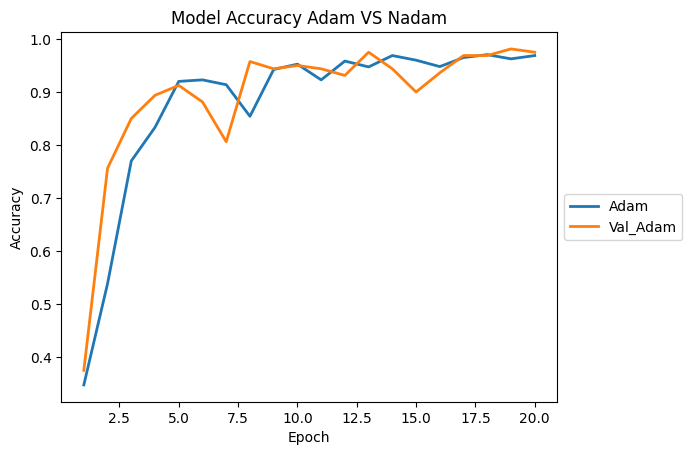

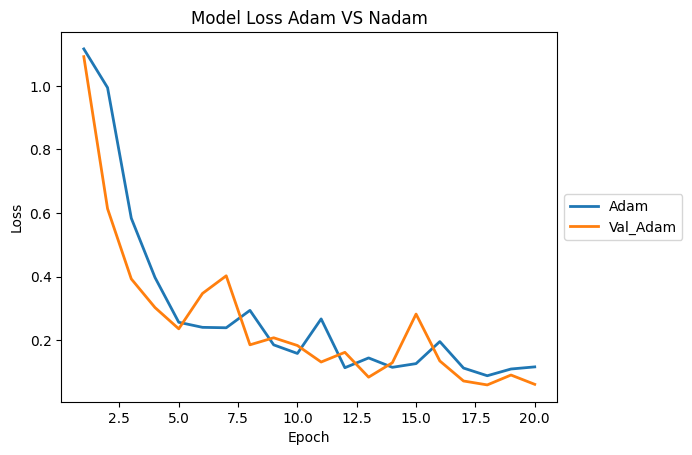

In [ ]:
#Visualisasi Hasil Data Training
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f','#bcbd22', '#17becf']

#Adam
adam_acc = HistoryAdam.history['accuracy'] #accuracy
adam_val_acc = HistoryAdam.history['val_accuracy']
adam_loss = HistoryAdam.history['loss'] #loss
adam_val_loss = HistoryAdam.history['val_loss']
adam_prec = HistoryAdam.history['prec'] #precission
adam_val_prec = HistoryAdam.history['val_prec']
adam_rec = HistoryAdam.history['rec'] #recall
adam_val_rec= HistoryAdam.history['val_rec']

#Nadam
# nadam_acc = HistoryNadam.history['accuracy'] #accuracy
# nadam_val_acc = HistoryNadam.history['val_accuracy']
# nadam_loss = HistoryNadam.history['loss'] #loss
# nadam_val_loss = HistoryNadam.history['val_loss']
# nadam_prec = HistoryNadam.history['prec'] #precission
# nadam_val_prec = HistoryNadam.history['val_prec']
# nadam_rec = HistoryNadam.history['rec'] #recall
# nadam_val_rec= HistoryNadam.history['val_rec']

#Iterasi
iterasi = list(range(1,21)) #itersi epoch+1

#Visualisasi Akurasi Model
plt.plot(iterasi, adam_acc, label='Adam', color=new_colors[0], linewidth=2)
plt.plot(iterasi, adam_val_acc, label='Val_Adam', color=new_colors[1], linewidth=2)
# plt.plot(iterasi, nadam_acc, label='Nadam', color=new_colors[2], linewidth=2)
# plt.plot(iterasi, nadam_val_acc, label='Val_Nadam', color=new_colors[3], linewidth=2)
plt.title("Model Accuracy Adam")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#Visualisasi Loss Model
plt.plot(iterasi, adam_loss, label='Adam', color=new_colors[0], linewidth=2)
plt.plot(iterasi, adam_val_loss, label='Val_Adam', color=new_colors[1], linewidth=2)
# plt.plot(iterasi, nadam_loss, label='Nadam', color=new_colors[2], linewidth=2)
# plt.plot(iterasi, nadam_val_loss, label='Val_Nadam', color=new_colors[3], linewidth=2)
plt.title("Model Loss Adam")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# #Visualisasi Precission Model
# plt.plot(iterasi, adam_prec, label='Adam', color=new_colors[0], linewidth=2)
# plt.plot(iterasi, adam_val_prec, label='Val_Adam', color=new_colors[1], linewidth=2)
# plt.plot(iterasi, nadam_prec, label='Nadam', color=new_colors[2], linewidth=2)
# plt.plot(iterasi, nadam_val_prec, label='Val_Nadam', color=new_colors[3], linewidth=2)
# plt.title("Model Precission Adam VS Nadam")
# plt.ylabel("Precission")
# plt.xlabel("Epoch")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

# #Visualisasi Recall Model
# plt.plot(iterasi, adam_rec, label='Adam', color=new_colors[0], linewidth=2)
# plt.plot(iterasi, adam_val_rec, label='Val_Adam', color=new_colors[1], linewidth=2)
# plt.plot(iterasi, nadam_rec, label='Nadam', color=new_colors[2], linewidth=2)
# plt.plot(iterasi, nadam_val_rec, label='Val_Nadam', color=new_colors[3], linewidth=2)
# plt.title("Model Recall Adam VS Nadam")
# plt.ylabel("Recall")
# plt.xlabel("Epoch")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# **Test Model**

Saving 0Ug54ifXRqqlZS2Z.png to 0Ug54ifXRqqlZS2Z (4).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
0Ug54ifXRqqlZS2Z (4).png
Gambar ini adalah Gunting


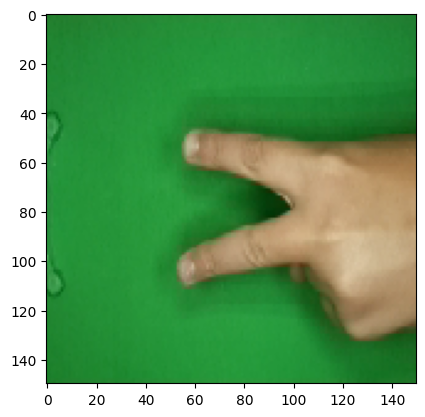

In [ ]:
#Predict use Adam Model
from google.colab import files
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = ModelAdam.predict(images, batch_size=10)

  print(fn)

  if classes[0,0] !=0:
    print("Gambar ini adalah Kertas")
  elif classes[0,1] !=0:
    print("Gambar ini adalah Batu")
  else:
    print("Gambar ini adalah Gunting")

#**Save Model**


In [ ]:
#install h5py
!pip install h5py

In [ ]:
# Save model Adam
model_json = ModelAdam.to_json()
with open("ModelAdam.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
ModelAdam.save_weights("ModelAdam2.weights.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Define weights path relative to the mounted drive
weights_path = '/content/gdrive/MyDrive/Colab Notebooks/Prak Machine Learning/TubesMachineLearning/your_model.weights.h5'

# Save model weights
ModelAdam.save_weights(weights_path)

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save model Adam
model_json = ModelNadam.to_json()
with open("ModelNadam.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
ModelNadam.save_weights("ModelNadam.h5")
print("Saved model to disk")

Saved model to disk


Saving bC8Fki1Na2rRSlBG.png to bC8Fki1Na2rRSlBG (11).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
bC8Fki1Na2rRSlBG (11).png
(1, 3)
Gambar ini adalah Batu


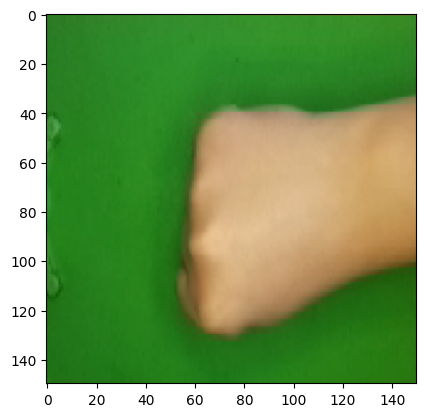

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, load_model # Added Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from google.colab import files

# Define the model architecture - This needs to match the original model
ModelAdam = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax') #terdiri dari 3 kelas
])


# Load the weights
weights_path = '/content/gdrive/MyDrive/Colab Notebooks/Prak Machine Learning/TubesMachineLearning/your_model.weights.h5'
ModelAdam.load_weights(weights_path) # Load weights into the defined model

# Upload image files for prediction
uploaded = files.upload()

for fn in uploaded.keys():
    # Load and preprocess the image
    img = image.load_img(fn, target_size=(150, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    # Make predictions
    classes = ModelAdam.predict(images, batch_size=10)

    # Print results
    print(fn)
    # Check the shape of classes and access elements accordingly - you may need to modify based on your model output
    print(classes.shape) # Check the shape of the 'classes' array
    # Access a specific element of the array for comparison
    if classes[0, 0] != 0: # Access the element based on the shape
        print("Gambar ini adalah Kertas")
    elif classes[0, 1] != 0:
        print("Gambar ini adalah Batu")
    else:
        print("Gambar ini adalah Gunting")